In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
cancer_data = pd.read_csv('project1.csv')
cancer_data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
381,no-recurrence-events,40-49,premeno,30-34,3-5,no,3,right,left_low,no
382,no-recurrence-events,60-69,ge40,30-34,3-5,yes,2,right,left_up,yes
383,no-recurrence-events,70-79,premeno,20-24,0-2,no,3,right,right_up,no
384,no-recurrence-events,70-79,premeno,30-34,9-11,no,1,right,left_low,yes


In [29]:
# Part 1 - Exploratory Data Analysis (EDA) on Dataset

# Identify shape, size of the raw data (1 point)
print(cancer_data.shape)
print(cancer_data.size)

(386, 10)
3860


In [30]:
# Get information about datatypes. Comment if any of the variables need
# datatype conversion. Check for duplicate rows and treat them. (1 point)
cancer_data.info()
print(f"# of duplicates: {cancer_data.duplicated().sum()}")
cancer_data.drop_duplicates(inplace=True)

# Based on the description of the dataset from UCI archives, the values
# for each column fall into these data types:
# 1. age - categorical
# 2. menopause - categorical
# 3. tumor-size - categorical
# 4. inv-nodes - categorical
# 5. node-caps - binary
# 6. deg-malig - integer
# 7. breast - binary
# 8. breast-quad - categorical
# 9. irradiat - binary
# 10. Class - binary

# From the csv data, class, node-caps, breast, and irradiat are object types
# and need to be converted to binary data types. age, menopause, tumor-size,
# inv-nodes, and breast-quad are object types and need to be converted to
# categorical data types. Finally, the data type for degree of malignancy
# (deg-malig) can be left as integer because it is an ordinal categorical
# variable, meaning that the values represent categories that have a
# natural order.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB
# of duplicates: 11


In [31]:
cancer_data['class'].value_counts()

class
no-recurrence-events    254
recurrence-events       121
Name: count, dtype: int64

In [32]:
# Identify missing data and/or invalid values and treat them with suitable
# mean, median, mode or other method (1 point)

# Print all unique values for each column
for col in cancer_data.columns:
    print(f"{col}: {cancer_data[col].unique()}")
    print()

class: ['recurrence-events' 'no-recurrence-events']

age: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

menopause: ['premeno' 'ge40' 'lt40']

tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49' nan]

inv-nodes: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' nan '24-26']

node-caps: ['no' '*' 'yes' '?']

deg-malig: [3 2 1]

breast: ['left' 'right']

breast-quad: ['left_low' 'right_up' 'left_up' 'right_low' '?' 'central' '*']

irradiat: ['no' 'yes']



In [33]:
# From this, we can see missing values for columns tumor-size, inv-nodes,
# node-caps, and breast-quad. Let us see what rows correspond to these
# missing values.
cancer_data[cancer_data['tumor-size'].apply(lambda x: x is np.nan)]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
168,no-recurrence-events,50-59,premeno,NaN,0-2,no,2,right,left_up,no


In [34]:
cancer_data[cancer_data['inv-nodes'].apply(lambda x: x is np.nan)]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
261,recurrence-events,40-49,ge40,25-29,NaN,yes,3,left,right_low,yes


In [35]:
cancer_data[cancer_data['node-caps'].apply(lambda x: x in ['?', '*'])]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
7,recurrence-events,60-69,ge40,20-24,0-2,*,1,left,left_low,no
22,recurrence-events,30-39,premeno,25-29,0-2,*,2,right,?,no
30,no-recurrence-events,50-59,ge40,40-44,0-2,*,3,right,left_up,no
97,no-recurrence-events,60-69,ge40,15-19,0-2,*,2,right,left_up,no
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,*,3,left,left_low,yes
233,no-recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes


In [36]:
cancer_data[cancer_data['breast-quad'].apply(lambda x: x in ['?', '*'])]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
6,recurrence-events,50-59,premeno,25-29,0-2,no,2,left,?,no
22,recurrence-events,30-39,premeno,25-29,0-2,*,2,right,?,no
63,no-recurrence-events,20-29,premeno,35-39,0-2,no,2,right,*,no
90,no-recurrence-events,30-39,premeno,0-4,0-2,no,2,right,*,no
133,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,?,no
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [37]:
# Based on the above and knowledge of the dataset, we can group the
# dataset by columns similar to each of the missing columns and then
# take the mode of each group to fill in the missing values. We will
# then replace the missing values with the mode of the group they
# belong to.

# For tumor-size, we will group by age and menopause because tumor size
# might be related to the patient's age and menopause status.
cancer_data['tumor-size'] = cancer_data \
    .groupby(['age', 'menopause'])['tumor-size'] \
    .transform(lambda x: x.fillna(x[x.apply( \
        lambda x: x is not np.nan)].mode()[0]))
    
# For inv-nodes, we will group by age and tumor-size because the number
# of involved nodes might be related to the patient's age and tumor size.
cancer_data['inv-nodes'] = cancer_data \
    .groupby(['age', 'tumor-size'])['inv-nodes'] \
    .transform(lambda x: x.fillna(x[x.apply( \
        lambda x: x is not np.nan)].mode()[0]))

# For node-caps, we will group by age and tumor-size because the presence
# of node caps might be related to the patient's age and tumor size.
cancer_data['node-caps'] = cancer_data \
    .groupby(['age', 'tumor-size'])['node-caps'] \
    .transform(lambda x: x.replace(['?', '*'], \
        x[x.apply(lambda x: x not in ['?', '*'])].mode()[0]))

# For breast-quad, we will group by breast and tumor-size because the
# location of the tumor might be related to the patient's breast and
# tumor size.
cancer_data['breast-quad'] = cancer_data \
    .groupby(['breast', 'tumor-size'])['breast-quad'] \
    .transform(lambda x: x.replace(['?', '*'], \
        x[x.apply(lambda x: x not in ['?', '*'])].mode()[0]))

In [38]:
# Now, print all unique values again for each column, and there
# should be no missing values.
for col in cancer_data.columns:
    print(f"{col}: {cancer_data[col].unique()}")
    print()
cancer_data.info()

class: ['recurrence-events' 'no-recurrence-events']

age: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

menopause: ['premeno' 'ge40' 'lt40']

tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

inv-nodes: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']

node-caps: ['no' 'yes']

deg-malig: [3 2 1]

breast: ['left' 'right']

breast-quad: ['left_low' 'right_up' 'left_up' 'right_low' 'central']

irradiat: ['no' 'yes']

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        375 non-null    object
 1   age          375 non-null    object
 2   menopause    375 non-null    object
 3   tumor-size   375 non-null    object
 4   inv-nodes    375 non-null    object
 5   node-caps    375 non-null    object
 6   deg-malig    375 non-null    int64 
 7   breast       375 non-null    object
 8   breast-qua

In [39]:
# Now that we have treated the missing values, we can convert the
# class, node-caps, breast, and irradiat columns to binary data types.
# We also rename the class column to is_recurring, the breast column
# to is_left_breast, the node-caps column to lymph_node_capsular_invasion,
# and the irradiat column to taken_radiation_therapy for clarity.
cancer_data['is_recurring'] = cancer_data['class'].map({'recurrence-events': 1, 'no-recurrence-events': 0})
del cancer_data['class']
cancer_data['lymph_node_capsular_invasion'] = cancer_data['node-caps'].map({'yes': 1, 'no': 0})
del cancer_data['node-caps']
cancer_data['is_left_breast'] = cancer_data['breast'].map({'left': 1, 'right': 0})
del cancer_data['breast']
cancer_data['taken_radiation_therapy'] = cancer_data['irradiat'].map({'yes': 1, 'no': 0})
del cancer_data['irradiat']

In [40]:
# Visualize the dataset through different univariate analysis and
# comment on your observations (2 points)

# Compute some basic statistics for the dataset
cancer_data.describe()
# For each of columns, the count of rows is 375. The mean of deg-malig
# is 2.07, indicating that most of the tumors are moderately malignant.
# The mean of lymph_node_capsular_invasion, taken_radiation_therapy, and
# is_recurring are all within the range of 0.2 to 0.3, indicating that
# the presence of node caps, the need for irradiation, and the recurrence
# of breast cancer are all relatively rare. The mean of is_left_breast is
# roughly 0.5, indicating that the dataset has roughly equal numbers of
# left and right breast cancer patients.

,deg-malig,is_recurring,lymph_node_capsular_invasion,is_left_breast,taken_radiation_therapy
count,375.000000,375.000000,375.000000,375.000000,375.000000
mean,2.074667,0.322667,0.258667,0.506667,0.218667
std,0.752730,0.468121,0.438487,0.500623,0.413894
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000


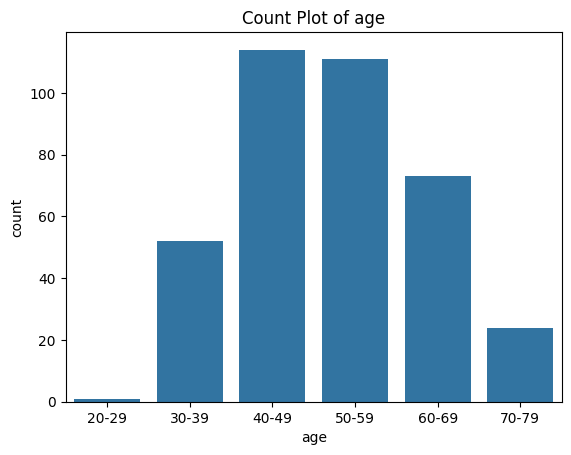

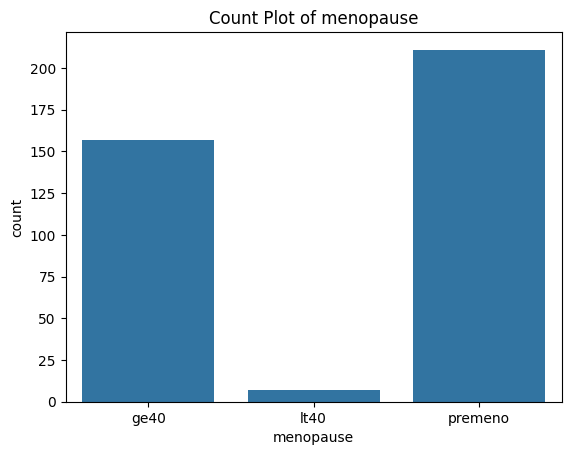

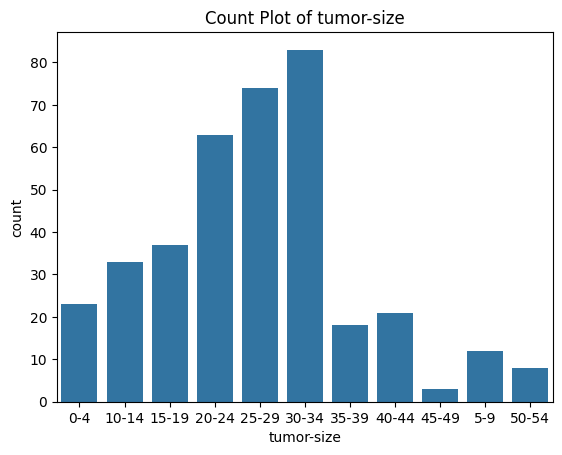

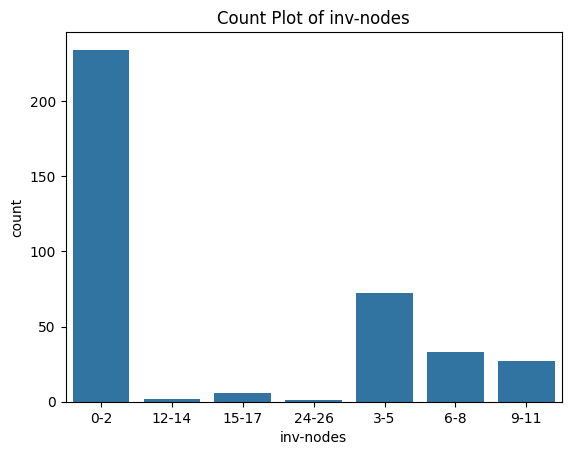

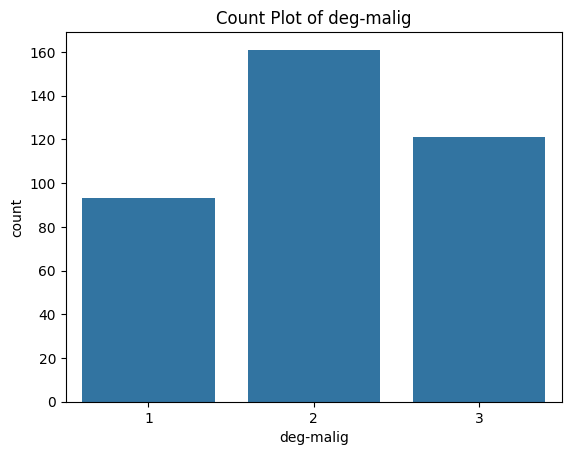

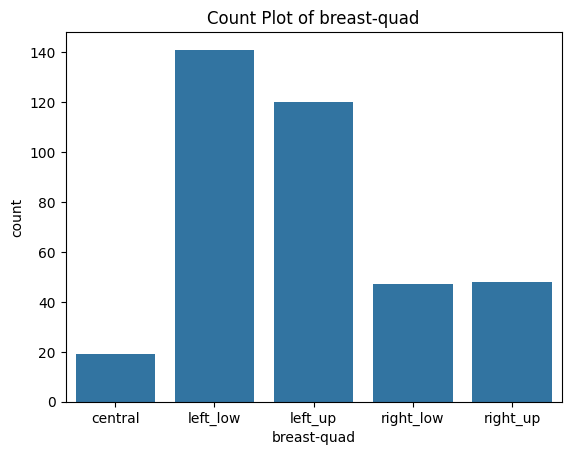

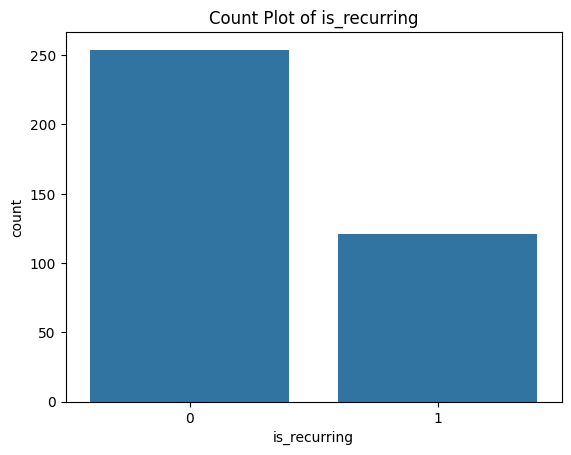

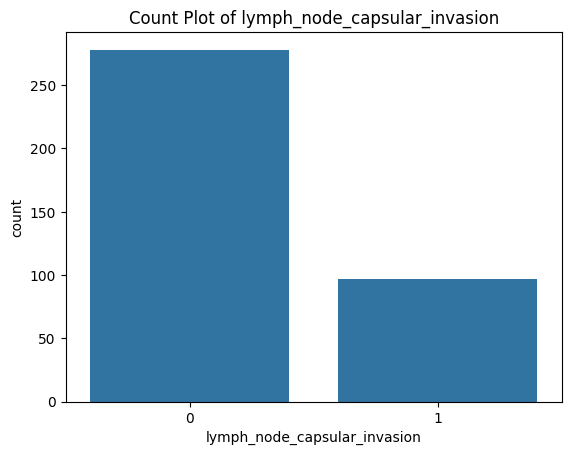

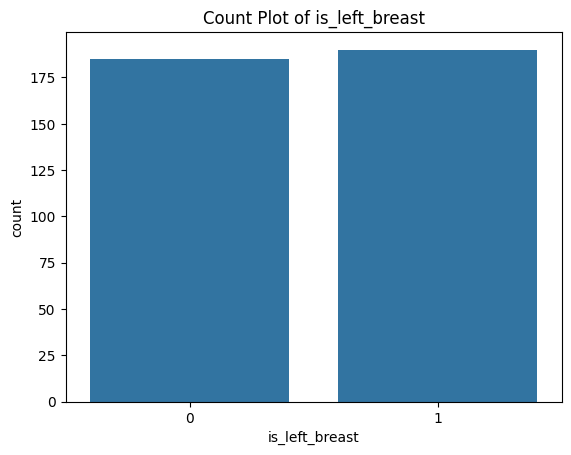

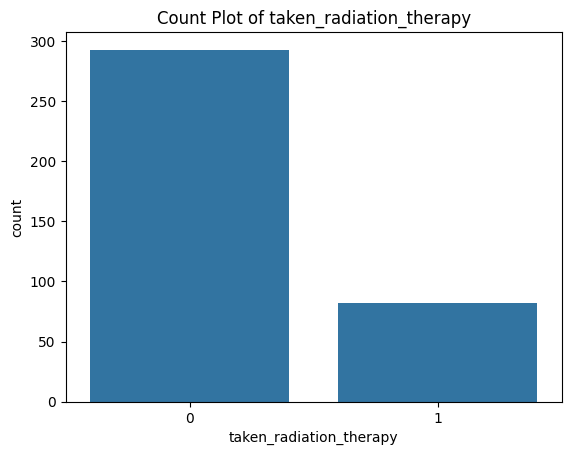

In [41]:
# Custom sort the columns to make the count plots more readable
def custom_sort(col):
    if col in ['age', 'tumor-size', 'inv-nodes']:
        return cancer_data[col].sort_values().unique()
    return cancer_data[col].sort_values().unique()

# Use count plots to visualize all of the columns in the dataframe, since
# they are all categorical, binary, or ordinal categorical (integer) variables.
for col in cancer_data.columns:
    sns.countplot(x=col, data=cancer_data, order=custom_sort(col))
    plt.title(f"Count Plot of {col}")
    plt.show()
# From these count plots, we can see that the dataset has more middle-aged
# patients from 40 to 60 years old. Most of the patients are in premenopause
# and ge40 menopause (post-menopause), but only a few in lt40 menopause.
# The tumor sizes are most frequent in the 25-34 mm range, followed by the
# 20-24 mm range. The number of involved nodes is most frequent in the 0-2
# range, followed by the 3-5 range. The presence of node caps, the number
# of people who have had radiation therapy, and the number of people who
# have had breast cancer recurrence are all relatively rare, while the
# location of left or right breast is evenly split. The degree of malignancy
# is most frequent in the 2 range, followed by the 3 range. Finally, the breast
# quadrant is most frequent in the left lower quadrant, followed by the left
# upper quadrant.

In [42]:
# Perform one-hot encoding on categorical variables (1 point)

# First, convert the remaining columns to categorical data types.
cancer_data['age'] = cancer_data['age'].astype('category')
cancer_data['menopause'] = cancer_data['menopause'].astype('category')
cancer_data['tumor-size'] = cancer_data['tumor-size'].astype('category')
cancer_data['inv-nodes'] = cancer_data['inv-nodes'].astype('category')
cancer_data['breast-quad'] = cancer_data['breast-quad'].astype('category')

cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           375 non-null    category
 1   menopause                     375 non-null    category
 2   tumor-size                    375 non-null    category
 3   inv-nodes                     375 non-null    category
 4   deg-malig                     375 non-null    int64   
 5   breast-quad                   375 non-null    category
 6   is_recurring                  375 non-null    int64   
 7   lymph_node_capsular_invasion  375 non-null    int64   
 8   is_left_breast                375 non-null    int64   
 9   taken_radiation_therapy       375 non-null    int64   
dtypes: category(5), int64(5)
memory usage: 20.7 KB


In [43]:
# Now, we can perform one-hot encoding on the remaining categorical variables
cancer_data = pd.get_dummies(cancer_data, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'breast-quad'], drop_first=True)

# Convert all bool columns to int (numerical values should perform better
# in machine learning models than "True" and "False" strings)
cancer_data = cancer_data.astype(int)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 385
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   deg-malig                     375 non-null    int64
 1   is_recurring                  375 non-null    int64
 2   lymph_node_capsular_invasion  375 non-null    int64
 3   is_left_breast                375 non-null    int64
 4   taken_radiation_therapy       375 non-null    int64
 5   age_30-39                     375 non-null    int64
 6   age_40-49                     375 non-null    int64
 7   age_50-59                     375 non-null    int64
 8   age_60-69                     375 non-null    int64
 9   age_70-79                     375 non-null    int64
 10  menopause_lt40                375 non-null    int64
 11  menopause_premeno             375 non-null    int64
 12  tumor-size_10-14              375 non-null    int64
 13  tumor-size_15-19              375 non-nu

In [44]:
# Finally, we can save the cleaned dataset to a new csv file
cancer_data.to_csv('project1_cleaned.csv', index=False)

In [45]:
# Split the data into training and test datasets. Make sure your split
# is reproducible and that it maintains roughly the proportion of each
# class of dependent variable. (1 point)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('project1_cleaned.csv')
data

,deg-malig,is_recurring,lymph_node_capsular_invasion,is_left_breast,taken_radiation_therapy,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,...,inv-nodes_12-14,inv-nodes_15-17,inv-nodes_24-26,inv-nodes_3-5,inv-nodes_6-8,inv-nodes_9-11,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,3,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,3,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
371,2,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
372,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
373,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [46]:
# Split the data into training and test datasets
X = data.drop('is_recurring', axis=1)
y = data['is_recurring']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [47]:
# Perform classification using: (6 points)
#   K-Nearest Neighbor Classifier
#   K-Nearest Neighbor Classifier using Grid search CV
#   Linear classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# K-Nearest Neighbor Classifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [48]:
# K-Nearest Neighbor Classifier using Grid search CV
knn_search_accuracy = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring='recall')
knn_gscv.fit(X_train, y_train)
print('Best n_neighbors:', knn_gscv.best_params_)
knn_gscv.best_estimator_

Best n_neighbors: {'n_neighbors': np.int64(1)}


KNeighborsClassifier(n_neighbors=np.int64(1))

In [49]:
# Linear classification
clf = SGDClassifier(loss='perceptron', alpha=0.01, class_weight={0: 254, 1: 121})
clf.fit(X_train, y_train)
clf

SGDClassifier(alpha=0.01, class_weight={0: 254, 1: 121}, loss='perceptron')

In [50]:
# Print report showing accuracy, recall, precision and f1-score
# for each classification model. Which metric is most important
# for this problem? (You will explain your answer in the report
# in Part 3). (2 points)

# For this problem, the most important metric is recall as we
# want to minimize the number of false negatives. False negatives
# in this case would be a recurring breast cancer case that was
# predicted to not recur. This would be a very serious mistake
# as the patient would not receive the necessary treatment to
# prevent the recurrence of breast cancer. Therefore, we want to
# minimize the number of false negatives and maximize the number
# of true positives. This is why recall is the most important
# metric for this problem, and why we use recall as the metric
# for scoring the classification models during training.
from sklearn.metrics import classification_report

# K-Nearest Neighbor Classifier
print("K-NEAREST NEIGHBOR CLASSIFIER:")
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")

K-NEAREST NEIGHBOR CLASSIFIER:
Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.70      0.99      0.82        77
           1       0.75      0.08      0.15        36

    accuracy                           0.70       113
   macro avg       0.72      0.54      0.48       113
weighted avg       0.71      0.70      0.60       113

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       177
           1       0.70      0.08      0.15        85

    accuracy                           0.69       262
   macro avg       0.70      0.53      0.48       262
weighted avg       0.69      0.69      0.60       262



In [51]:
# K-Nearest Neighbor Classifier using Grid search CV
print("K-NEAREST NEIGHBOR CLASSIFIER USING GRID SEARCH CV:")
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn_gscv.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn_gscv.predict(X_train))}")

K-NEAREST NEIGHBOR CLASSIFIER USING GRID SEARCH CV:
Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        77
           1       0.33      0.36      0.35        36

    accuracy                           0.57       113
   macro avg       0.51      0.51      0.51       113
weighted avg       0.58      0.57      0.57       113

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       177
           1       0.98      0.98      0.98        85

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



In [52]:
# Linear classification
print("LINEAR CLASSIFICATION (SGD):")
print(f"Performance on TEST\n*******************\n{classification_report(y_test, clf.predict(X_test), zero_division=0)}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, clf.predict(X_train), zero_division=0)}")

LINEAR CLASSIFICATION (SGD):
Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        77
           1       1.00      0.03      0.05        36

    accuracy                           0.69       113
   macro avg       0.84      0.51      0.43       113
weighted avg       0.79      0.69      0.57       113

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       177
           1       1.00      0.04      0.07        85

    accuracy                           0.69       262
   macro avg       0.84      0.52      0.44       262
weighted avg       0.79      0.69      0.57       262

